# Data set #2: UCI Early State Diabetes Risk Prediction

#SJN Group

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the three models that we will use. logisitc regression, DTclassifier, AND SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold # Need this to split up our data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
from sklearn import preprocessing

data = pd.read_csv('diabetes_data_upload.csv') # read in our csv
data.columns = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'SuddenWeightLoss',
                'weakness', 'Polyphagia', 'GenitalThrush', 'VisualBlurring',
                'Itching', 'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness', 'Alopecia', 'Obesity', 'Class'] #making all of our columns


# This dataset will have to be processed much differently due to the data not being numerical.

In [35]:
data.head()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               520 non-null    int64 
 1   Gender            520 non-null    object
 2   Polyuria          520 non-null    object
 3   Polydipsia        520 non-null    object
 4   SuddenWeightLoss  520 non-null    object
 5   weakness          520 non-null    object
 6   Polyphagia        520 non-null    object
 7   GenitalThrush     520 non-null    object
 8   VisualBlurring    520 non-null    object
 9   Itching           520 non-null    object
 10  Irritability      520 non-null    object
 11  DelayedHealing    520 non-null    object
 12  PartialParesis    520 non-null    object
 13  MuscleStiffness   520 non-null    object
 14  Alopecia          520 non-null    object
 15  Obesity           520 non-null    object
 16  Class             520 non-null    object
dtypes: int64(1), obj

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


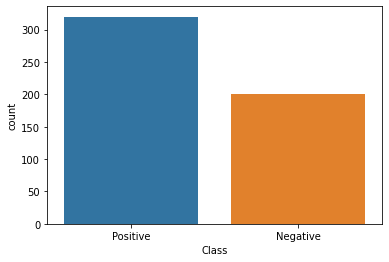

In [37]:
# Making a countplot to see the distribution of positive diabetes cases and negative diabetes cases. 

sns.countplot('Class', data=data)

In [38]:
# Probably have to impose sampling on this dataset so that it is more accurate. 

In [39]:
# Have to convert this into numerical values so we can apply our models. 

# Use the preprocessing feature to use the label encoder function which turns nominal values to either 0 or 1. This is perfect for our data since it will turn yes or no or positive or negative into 0 or 1. 
label = preprocessing.LabelEncoder()

# Function takes in the columns. It then returns the fitted and transformed column. 
def nomTonumLabel(col):
  return label.fit(col).transform(col)

# We then apply the function to our data, changing the values of our columns. 
data = data.apply(nomTonumLabel)

# Printing data head to see our new results. 
data.head()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [40]:
data.isnull().sum()

Age                 0
Gender              0
Polyuria            0
Polydipsia          0
SuddenWeightLoss    0
weakness            0
Polyphagia          0
GenitalThrush       0
VisualBlurring      0
Itching             0
Irritability        0
DelayedHealing      0
PartialParesis      0
MuscleStiffness     0
Alopecia            0
Obesity             0
Class               0
dtype: int64

In [41]:
data.describe()

,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Itching,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,23.905769,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,11.754586,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


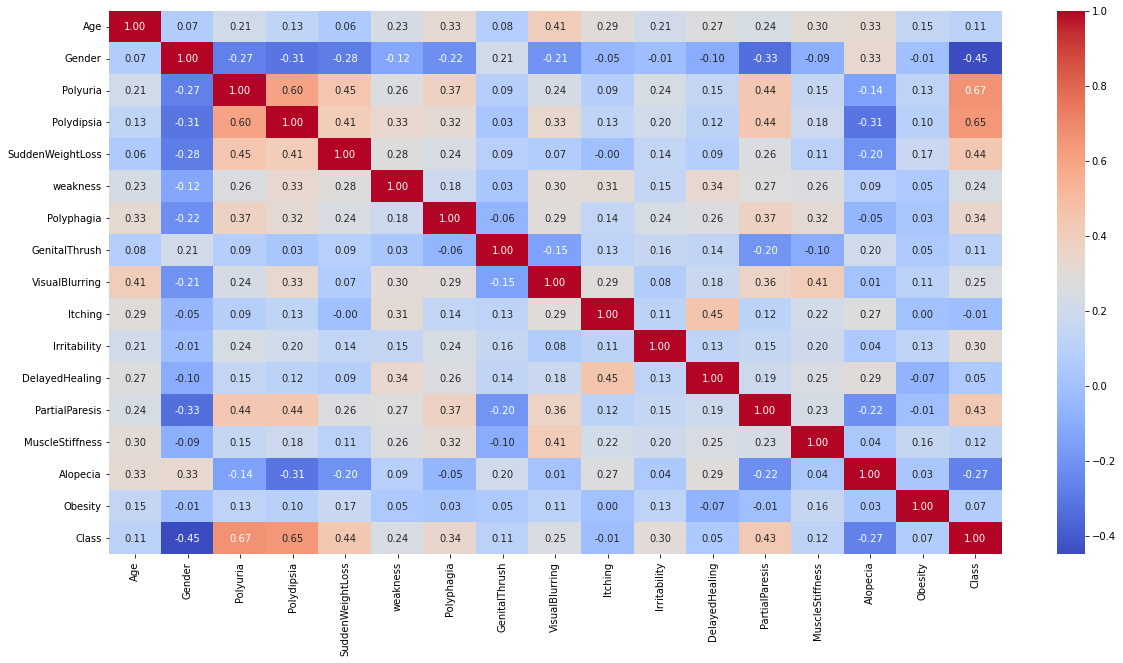

In [42]:
# Heatmap of all of our data

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# This shows us that polyuria and polydipsia had the highest correleation at 0.67, and 0.65 respectively.

In [43]:
# Due to gender, alopecia, and itching having negative values we have removed them. 

data.drop(['Gender'], axis = 1)
data.drop(['Alopecia'], axis = 1)
data.drop(['Itching'], axis = 1)



,Age,Gender,Polyuria,Polydipsia,SuddenWeightLoss,weakness,Polyphagia,GenitalThrush,VisualBlurring,Irritability,DelayedHealing,PartialParesis,MuscleStiffness,Alopecia,Obesity,Class
0,16,1,0,1,0,1,0,0,0,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,15,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1
516,24,0,1,1,1,1,1,0,0,1,1,1,0,0,0,1
517,34,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1
518,8,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0


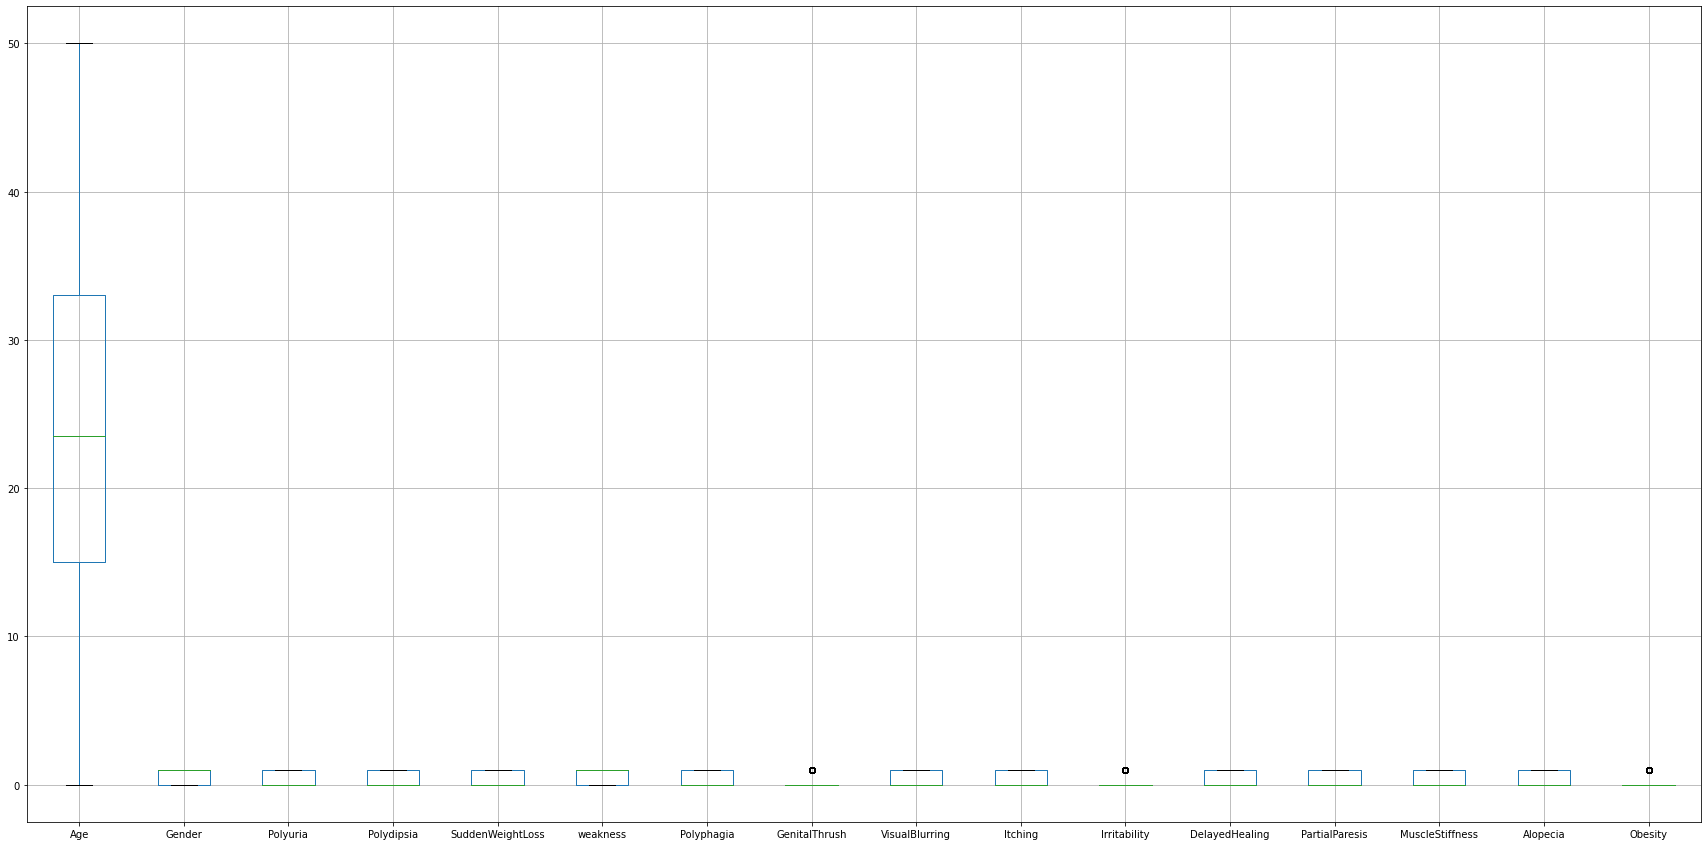

In [44]:
# Checking outliers, should only be outliers for age if any. 

%matplotlib inline
data2 = data.drop(('Class'), axis=1)
data2.boxplot(figsize=(30,15))

In [45]:
# checking if there are outliers anyways with our code

# find show and delete the outliers
# need to find IQR, which is Q3 - Q1, which is where the outliers reside. 

def find_outliers(data, n, features): #taking in our data frame, n, and the feature columns
  outlierIndex = [] #will want to append to this so that we know where the indices are in our data, so that we can delete the outliers

  # iterate over feature columns and find the data for q1 and q3 and store it in their variables. 25 for 25th precentile and 75 for 75th precentile which is Q1 and Q3
  for col in features:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1 #setting our IQR variable, which is Q3 - Q1

    #After finding the interquartile range, we must multiple it by 1.5
    outlierStep = 1.5 * IQR

    # Find the list of indices. This is done by subtracting the step from Q1, and then adding the step to Q3.
    # So we set the list to column data that is less than Q1 - outlier step and data that is greater than q3 + outlier step. And we take the index because we want the position,
    outlier_col_index = data[(data[col] < Q1 - outlierStep) | (data[col] > Q3 + outlierStep)].index

    # Append all of the data that we gather in the previous step, to the outlier_indes list we made at the beginning
    outlierIndex.extend(outlier_col_index)

  #Finally, we make the information we return
  # Set the index to the Counter of the list. What this will do is give us the element, with the number of times that it appears in the data next to it.
  # So, outlierIndex = ['blue', 'red', 'orange'] to ({'blue': 2, 'red': 3, "yellow": 1}) -> obviously won't have data that looks like that though.
  outlierIndex = Counter(outlierIndex)
  # 
  variousOutliers = list( j for j, i in outlierIndex.items() if i > n )

  # returning
  return variousOutliers

#Put the found outliers inside of a variable. 
outliersToDrop = find_outliers(data, 2, ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'SuddenWeightLoss',
                'weakness', 'Polyphagia', 'GenitalThrush', 'VisualBlurring',
                'Itching', 'Irritability', 'DelayedHealing', 'PartialParesis', 'MuscleStiffness', 'Alopecia', 'Obesity', 'Class'])


In [46]:
data.drop(data.loc[outliersToDrop].index, inplace=True)

In [47]:
# Now we can actually start out models. 

# Step #1 drop the classifier column

X = data.drop(['Class'], axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [48]:
# Single score SVC

clfSvc = SVC()
clfSvc.fit(X_train, y_train)
clfSvc.score(X_test, y_test)

0.6274509803921569

In [49]:
# Single score DT

clfDt = DecisionTreeClassifier()
clfDt.fit(X_train, y_train)
clfDt.score(X_test, y_test)

0.9705882352941176

In [50]:
# Single score Logistic Regression

clfLr = LogisticRegression(n_jobs=5)
clfLr.fit(X_train, y_train)
clfLr.score(X_test, y_test)

0.9019607843137255

# Stratified Cross Validation 10 fold. 

In [51]:
# Creating our stratifiedkfold, and giving it 10 splits making it 10 fold. 

skf = StratifiedKFold(n_splits=10)

In [52]:
# Splitting for X and y. 

skf.split(X,y)

<generator object _BaseKFold.split at 0x7f9287f74d50>

In [53]:
# Gets the stratified cross validation 10 times of decision tree

#Make our empty list to append our scores too
Dt_accuracy = []

# Get the x y splits for the n splits of skf. 
skf.get_n_splits(X, y)

# Iterate through 
for train_index, test_index in skf.split(X,y):

  #print our values and set our variables to the proper information.
  #Uncomment print to see scores, but it is very long and makes the file much lengthier.
  #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]
 

  # fit our dt classifier to x1 train and y1 train
  clfDt.fit(newX_train, newy_train)

  #predict with x1 test
  prediction = clfDt.predict(newX_test)

  #score is the accuracy score of our prediction and y1 test
  score = accuracy_score(prediction, newy_test)

  # append all of our scores
  Dt_accuracy.append(score)


In [54]:
# Mean accuracy of decision tree skf 10 times!

print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Dt_accuracy).mean()}")

# Mean accuracy percentage of decision tree skf 10 times!

dtAccPercent = (np.array(Dt_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {dtAccPercent:.2f}%")

Stratified cross validation with 10 folds mean accuracy:  0.9567843137254901
Stratified cross validation with 10 folds mean accuracy percentage 95.68%


In [55]:
Svc_accuracy = []

skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X,y):
   #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]

  clfSvc.fit(newX_train, newy_train)
  prediction = clfDt.predict(newX_test)
  score = accuracy_score(prediction, newy_test)
  Svc_accuracy.append(score)

In [56]:
print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Svc_accuracy).mean()}")
svcAccPercent = (np.array(Svc_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {svcAccPercent:.2f}%")

Stratified cross validation with 10 folds mean accuracy:  0.9960000000000001
Stratified cross validation with 10 folds mean accuracy percentage 99.60%


In [57]:
# This will get us all of our scores for Logistic Regression

# Make empty list

Lr_accuracy = []

# Get the splits for X and y. 

skf.get_n_splits(X, y)

# For our indexes in the skf.split x,y
for train_index, test_index in skf.split(X,y):
  #print("Train: ", train_index, "Validation: ", test_index)
  newX_train = X.iloc[train_index]
  newX_test = X.iloc[test_index]
  newy_train = y.iloc[train_index]
  newy_test = y.iloc[test_index]


  # fit the logistic regression classifier to the x and y train
  clfLr.fit(newX_train, newy_train)
  # then predict it with the x1 test
  prediction = clfLr.predict(newX_test)
  # then set the score the the accuracy score with the prediction and y1 test variable
  score = accuracy_score(prediction, newy_test)

  # then append all of the scores.
  Lr_accuracy.append(score)

In [58]:
print(f"Stratified cross validation with 10 folds mean accuracy:  {np.array(Lr_accuracy).mean()}")
lrAccPercent = (np.array(Lr_accuracy).mean() * 100)
print(f"Stratified cross validation with 10 folds mean accuracy percentage {lrAccPercent:.2f}%")

Stratified cross validation with 10 folds mean accuracy:  0.9331764705882353
Stratified cross validation with 10 folds mean accuracy percentage 93.32%


In [59]:
# precision, recall, f score for dt
yPredictions = clfDt.predict(X_test)

print(classification_report(y_test, yPredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [60]:
# precision, recall, fscore for svc
yPredictions = clfSvc.predict(X_test)

print(classification_report(y_test, yPredictions))

              precision    recall  f1-score   support

           0       0.70      0.31      0.43        45
           1       0.62      0.89      0.73        57

    accuracy                           0.64       102
   macro avg       0.66      0.60      0.58       102
weighted avg       0.66      0.64      0.60       102



In [61]:
# Precision, recall, fscore for lr
yPredictions = clfLr.predict(X_test)

print(classification_report(y_test, yPredictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.89      0.89      0.89        57

    accuracy                           0.88       102
   macro avg       0.88      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102

